In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import utils
from continuous import *
import time

In [2]:
import time
result_iter = []
result_em_R2 = []
result_knn_R2 = []
result_t_em =[]
result_t_knn =[]
for rate in np.arange(0.1,0.7,0.1):
  print("now at", rate, "\n")
  truth_df = pd.read_csv("./data/original.csv")
  X = truth_df.drop('PM2.5',axis=1)
  missing_result = utils.simulate_nan(X, nan_rate=rate)
  missing_df = missing_result['X']

  s_time = time.time()
  result_imputed = utils.impute_em(missing_df, 3000, 1e-05)
  duration = time.time() - s_time
  result_t_em.append(duration)
  result_iter.append(result_imputed['iteration'])
  
  imputed_df = result_imputed['X_imputed']
  X = sm.add_constant(imputed_df)
  y= truth_df['PM2.5'].values
  model = sm.OLS(y,X).fit()
  result_em_R2.append(model.rsquared_adj)
  
  imputer = KNNImputer(n_neighbors=3)
  s_time = time.time()
  knn_X = imputer.fit_transform(missing_df)
  duration = time.time() - s_time
  result_t_knn.append(duration)
  
  knn_X_df = pd.DataFrame(knn_X, columns=missing_df.columns)
  knn_X = sm.add_constant(knn_X)
  model = sm.OLS(y,knn_X).fit()
  result_knn_R2.append(model.rsquared_adj)

now at 0.1 



c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


now at 0.2 



c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


now at 0.30000000000000004 



c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


now at 0.4 



c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


now at 0.5 



c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


now at 0.6 



c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0, 0.5, 'R^2')

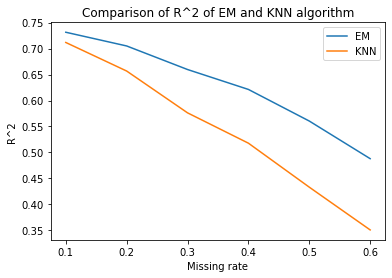

In [3]:
plt.plot(np.arange(0.1,0.7,0.1), result_em_R2)
plt.plot(np.arange(0.1,0.7,0.1), result_knn_R2)
plt.legend(('EM', 'KNN'))
plt.title("Comparison of R^2 of EM and KNN algorithm")
plt.xlabel("Missing rate")
plt.ylabel("R^2")

Text(0, 0.5, 'Time consumption')

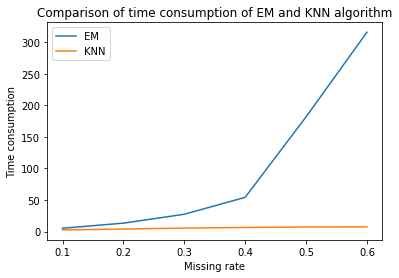

In [7]:
plt.plot(np.arange(0.1,0.7,0.1), result_t_em)
plt.plot(np.arange(0.1,0.7,0.1), result_t_knn)
plt.legend(('EM', 'KNN'))
plt.title("Comparison of time consumption of EM and KNN algorithm")
plt.xlabel("Missing rate")
plt.ylabel(("Time consumption"))

In [ ]:
# con = continuous()
# frame = con.comparison(knn_X_df, result_imputed['X_imputed'])

In [5]:
print(result_t_em)

[5.244932413101196, 13.26979112625122, 27.357760429382324, 54.182000160217285, 181.52291989326477, 315.58977365493774]
